In [1]:
import json
from collections import defaultdict

In [2]:
with open("labeled_tz.json") as file:
    labeled = json.load(file)

In [3]:
classes_amount = defaultdict(int)
for item in labeled.values():
    for line in item:
        classes_amount[line["label"]] += 1

print(classes_amount)

defaultdict(<class 'int'>, {'title': 79, 'part': 151, 'item': 489, 'raw_text': 262, 'other': 29, 'toc': 395})


In [4]:
classes_list = [item for item in zip(classes_amount.values(), classes_amount.keys())]
classes_list = sorted(classes_list)[::-1]

classes_num = [item[0] for item in classes_list]
classes_name = [item[1] for item in classes_list]

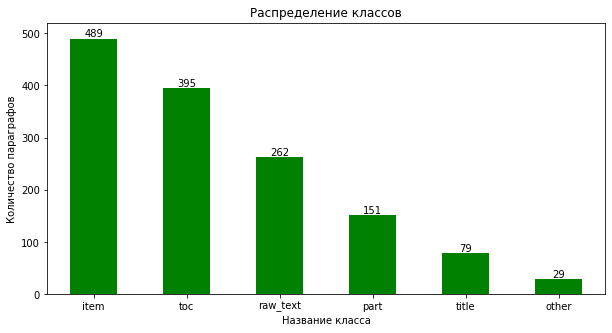

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

classes_series = pd.Series(classes_num)
# Plot the figure.
plt.figure(figsize=(10, 5))
ax = classes_series.plot(kind='bar', ylim=(0, 520), color='green')
ax.set_title('Распределение классов')
ax.set_xlabel('Название класса')
ax.set_ylabel('Количество параграфов')
ax.set_xticklabels(classes_name, rotation=0)

rects = ax.patches

for rect, class_amount in zip(rects, classes_num):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, class_amount,
            ha='center', va='bottom')
plt.savefig('paragraph_distribution.png')